# **Что важно помнить!!!**

- Порядок кубитов в векторе соответствует из порядку на обозначении. Например, в $|01>$ первый фотон имеет значение $0$, а второй — $1$.

- [X] меняет $0$ на $\pm1$, $\pm1$ на $0$

- [Z] меняет $1$ на $-1$, $-1$ на $1$, $0$ не меняет

- [H] меняет $0$ на $(|0> + |1>)$, $1$ на $(|0> - |1>)$

- [CX], [CZ] работают аналогично [X] и [Z], но кубит, где сам вентиль, срабатывает, только если кубит, от которого тянется линия ("контроллирующий") равен $1$ (иначе он не делает ничего)

---

### Суть: расписать (на листочке!!!) эволюцию значений системы, после этого провести симуляцию и сравнить значения с результатами квантовой симуляции.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

In [2]:
def count_stats(qc):
    qc.measure_all()

    simulator = AerSimulator()
    result = simulator.run(qc, shots=1000).result()
    counts = result.get_counts()
 
    return counts

# №1

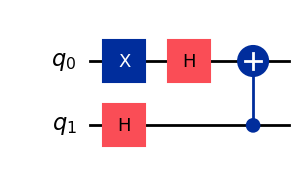

In [3]:
qc = QuantumCircuit(2)

qc.x(0)
qc.h(1)
qc.h(0)
qc.cx(
    1, # Контроллирующий фотон
    0  # Фотон куда применяем
)

qc.draw('mpl')

Начало схемы: $|00>$

Строка 3: $|10>$

Строка 4: $|1>(|0> + |1>)$

Строка 5: $(|0> - |1>)(|0> + |1>)$

$= |00> + |01> - |10> - |11>$

Строка 6: $|00> + |11> - |10> - |01>$

In [4]:
count_stats(qc)

{'01': 237, '11': 252, '10': 240, '00': 271}

# №2

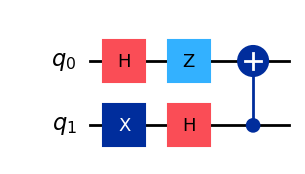

In [5]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.z(0)
qc.h(1)
qc.cx(
    1, # Контроллирующий фотон
    0  # Фотон куда применяем
)

qc.draw('mpl')

Начало схемы: $|00>$

Строка 3: $(|0> + |1>)|0>$

Строка 4: $(|0> + |1>)|1>$

Строка 5: $(|0> - |1>)|1>$

Строка 6: $(|0> - |1>)(|0> - |1>)$

$= |00> - |01> - |10> + |11>$

Строка 7: $|00> - |01> - |10> - |11>$

In [6]:
count_stats(qc)

{'11': 254, '10': 249, '00': 253, '01': 244}

# №3

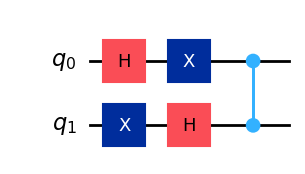

In [7]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.x(0)
qc.h(1)
qc.cz(
    1, # Контроллирующий фотон
    0  # Фотон куда применяем
)

qc.draw('mpl')

Начало: $|00>$

Стр. 3: $(|0> + |1>)|0>$

Стр. 4: $(|0> + |1>)|1>$

Стр. 5: $(|1> + |0>)|1>$

Стр. 6: $(|1> + |0>)(|0> - |1>)$

$= |10> - |11> + |00> - |01>$

Стр. 7: $|10> + |11> + |00> - |01>$

In [8]:
count_stats(qc)

{'01': 260, '10': 237, '00': 262, '11': 241}

# №4

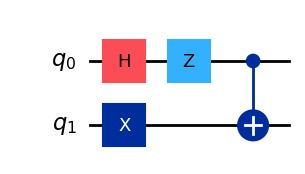

In [9]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.z(0)
qc.cx(
    0, # Контроллирующий фотон
    1  # Фотон куда применяем
)

qc.draw('mpl')

Начало: $|00>$

Стр. 3: $(|0> + |1>)|0>$

Стр. 4: $(|0> + |1>)|1>$

Стр. 5: $(|0> - |1>)|1>$

$= |01> - |11>$

Стр. 6: $|01> - |10>$

In [10]:
count_stats(qc)

{'01': 499, '10': 501}

# №5. Алгоритм ~~Хрююуииряя~~ Гровера

Версия на двух кубитах — версия со вспомогательным кубитом похожим образом работает, см. закомментированный код. Убедиться, что в конце 100% получается искомое состояние (здесь: $|11>$); в случае версии со вспомогательным кубитом, последний мы не измеряем.

In [11]:
# qc = QuantumCircuit(3)

# qc.x(2)
# qc.h(2)

# # Создаём суперпозиции из всех возможных вариантов
# qc.h(0)
# qc.h(1)
# qc.barrier()

# # ОРАКУЛ -- помечает искомое сост. знаком МИНУС
# qc.cx([0, 1], 2)
# qc.barrier()

# # Убираем суперпозиции из всех возможных вариантов
# qc.h(0)
# qc.h(1)

# # ИНВЕРСИЯ ОТНОСТИЛЬНО СРЕДНЕГО
# qc.h(0)
# qc.h(1)
# qc.x(0)
# qc.x(1)
# qc.cx([0, 1], 2)
# qc.x(0)
# qc.x(1)
# qc.h(0)
# qc.h(1)

# qc.draw('mpl')

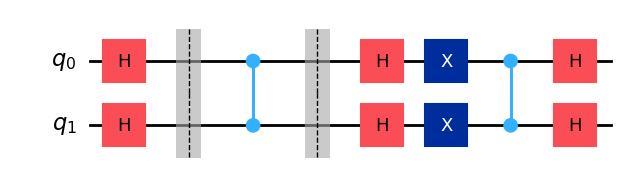

In [12]:
qc = QuantumCircuit(2)

# Создаём суперпозиции из всех возможных вариантов
qc.h(0)
qc.h(1)
qc.barrier()

# ОРАКУЛ -- помечает искомое сост. знаком МИНУС
qc.cz(0, 1)
# qc.x(0) # Для |10>
# qc.x(1) # Для |01>
# qc.x([0, 1]) # Для |00>
qc.barrier()

# ИНВЕРСИЯ ОТНОСИТЕЛЬНО СРЕДНЕГО
qc.h(0)
qc.h(1)
qc.x(0)
qc.x(1)
qc.cz(0, 1)
qc.h(0)
qc.h(1)

qc.draw('mpl')

Начало: $|00>$

Стр. 5: $(|0> + |1>)(|0> + |1>)$

$= |00> + |01> + |10> + |11>$

Стр. 9: $|00> + |01> + |10> - |11>$

Стр. 13: $(|0> + |1>)|0> + (|0> + |1>)|1> + (|0> - |1>)|0> - (|0> - |1>)|1>$

Стр. 14: $(|0> + |1>)(|0> + |1>)> + (|0> + |1>)(|0> - |1>) + (|0> - |1>)(|0> + |1>) - (|0> - |1>)(|0> - |1>)$

$= |00> + |01> + |10> + |11> + |00> - |01> + |10> - |11> + |00> + |01> - |10> - |11> - |00> + |01> + |10> - |11>$

$= |00> + |10> + |00> + |01> - |11> + |01> + |10> - |11>$

$= 2|00> + 2|01> + 2|10> - 2|11>$

Стр. 16: $2|11> + 2|10> + 2|01> - 2|00>$

Стр. 17: $- 2|11> + 2|10> + 2|01> - 2|00>$

$= - 2|00> + 2|01> + 2|10> - 2|11>$

Стр. 19: $- 2(|0> + |1>)(|0> + |1>)> + 2(|0> + |1>)(|0> - |1>) + 2(|0> - |1>)(|0> + |1>) - 2(|0> - |1>)(|0> - |1>)$

$= - 2|00> - 2|01> - 2|10> - 2|11> + 2|00> - 2|01> + 2|10> - 2|11> + 2|00> + 2|01> - 2|10> - 2|11> - 2|00> + 2|01> + 2|10> - 2|11>$

$= - 2|11> - 2|11> - 2|11> - 2|11>$

$= -8|11>$

In [13]:
count_stats(qc)

{'11': 1000}

# Алгоритм Гровера (3 кубита)

Аналогичная схема для трёх кубит.

Подобрать оракул для нахождения 7-ку ($|110>$), проверить результат в симуляторе (что находится именно $|110>$), а затем вычислить эволюцию системы.

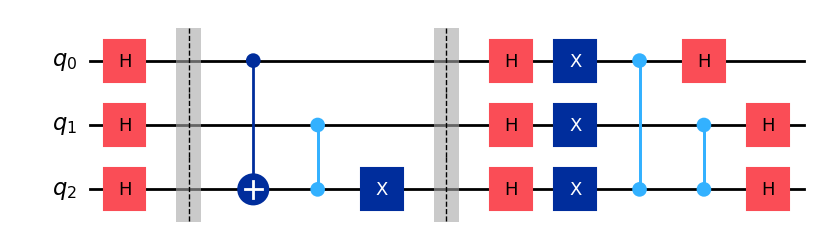

In [14]:
qc = QuantumCircuit(3)

# Создаём суперпозиции их всех возможных вариантов
qc.h(0)
qc.h(1)
qc.h(2)
qc.barrier()

# ОРАКУЛ -- помечает искомое сост. знаком МИНУС
qc.cx(0, 2)
qc.cz(1, 2)
qc.x(2)
qc.barrier()

# Создаём суперпозиции их всех возможных вариантов
qc.h(0)
qc.h(1)
qc.h(2)

# ИНВЕРСИЯ ОТНОСТИЛЬНО СРЕДНЕГО
qc.x(0)
qc.x(1)
qc.x(2)
qc.cz([0, 1], 2)
qc.h(0)
qc.h(1)
qc.h(2)

qc.draw('mpl')

In [15]:
count_stats(qc)

{'111': 524, '110': 476}

Бл\*н а как не $|110>, |111>$ а просто $|110>$ получить... сложна...

Код ниже взят из https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/grover.ipynb (изменённая версия, чтобы находиьт только $|110>$):

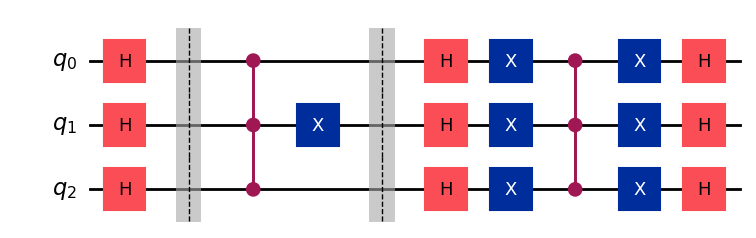

In [25]:
qc = QuantumCircuit(3)

# Создаём суперпозиции из всех возможных вариантов
qc.h(0)
qc.h(1)
qc.h(2)
qc.barrier()

# ОРАКУЛ ДЛЯ |110> (дежурное напоминание, что qiskit составляет
# Кет-вектора завод наперёд, т.е. нам надо q0=0, q1=1, q2=1)

qc.ccz(0, 1, 2) # Теперь применяем CCZ gate (если ВСЕ контрольные
                # кубиты =1, то вентиль применяется, иначе нет)

qc.x(1) # Инвертируем q0, чтобы условие стало: q0=0, q1=1, q2=1

# В зависимости от нужного числа инвертируются разные кубиты,
# например для 101 надо q1, для 010 надо q0 И q2 и так далее...
qc.barrier()

# ИНВЕРСИЯ ОТНОСИТЕЛЬНО СРЕДНЕГО
qc.h(0)
qc.h(1)
qc.h(2)
qc.x(0)
qc.x(1)
qc.x(2)
qc.ccz(0, 1, 2)
qc.x(0)
qc.x(1)
qc.x(2)
qc.h(0)
qc.h(1)
qc.h(2)

qc.draw('mpl')

In [26]:
count_stats(qc)

{'110': 41,
 '111': 31,
 '011': 30,
 '100': 29,
 '010': 28,
 '000': 27,
 '001': 43,
 '101': 771}